In [4]:
# load thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1 style='color:blue;'><b>BUSINESS UNDERSTANDING</b></h1>

House price is a problem for people when they move from a place to another place for studying or working. Ho Chi Minh is one of the largest commercial centers of Vietnam, most of people from the North, Center or Mekong, South East living in Ho Chi Minh. Besides, Ho Chi Minh have various famous university overtime such as the University of Science, the University of Medicine and Pharmacy, the University of Social Science and Humanities, the University of Technology... Ho Chi Minh is the center of international trade. So that the needs for accommodation in Ho Chi Minh of students, employees and foreigners is the topic issue. Imaging that people can input features of accommodation that they desire to rent and our computers can show evidence of prices for reference. This survey aims to:

- Survey house price of Ho Chi Minh city using data visualizations and descriptive statistics.
- Build model to predict house price based on house features based on regression models.

<h1 style='color:blue;'><b>DATA UNDERSTANDING</b></h1>

<h1 style='color:blue;'><b>Load Data</b></h1>

In [25]:
# 1. Đọc dữ liệu, in 5 dòng đầu, 5 dòng cuối.


In [12]:
house_price = pd.read_excel('House_data.xlsx', engine='openpyxl')

In [13]:
house_price.head(3)

,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
0,149065,Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...,"Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn",3700,4,3,Đ.Bắc,20.71,5.0,Sổ hồng,1 trệt + 1 lầu,104.5,134.7,5.0,0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên,...",ấp thới tây 2,Xã Tân Hiệp,Huyện Hóc Môn
1,205270,"Bán Nhà Hẻm Đường Huỳnh Tấn Phát, xã Phú Xuân ...","Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà Bè",3800,2,2,Đ.Bắc,14.35,5.0,Sổ hồng,1 trệt + 1 lầu,71.8,137.6,5.0,0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên,...",huỳnh tấn phát,Xã Phú Xuân,Huyện Nhà Bè
2,307136,"Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng...","Đường Lò Siêu, Phường 16, Quận 11",6500,5,5,T.Nam,10.00,5.2,Sổ hồng,"1 trệt, 1 lửng, 1 tầng thượng + 2 lầu",52.1,70.3,5.0,1,NaN,lò siêu,Phường 16,Quận 11


In [23]:
house_price.tail(2)

,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
4283,339105,CẦN BÁN NHÀ NGUYÊN CĂN VUÔNG VỨC ĐƯỜNG HUỲNH V...,"Đường Huỳnh Văn Bánh, Phường 17, Quận Phú Nhuận",4200,2,2,Đ.Bắc,9.20,3.2,Sổ hồng,1 trệt + 1 lầu,31.6,63.2,1.76,0,"Gần chợ, siêu thị Gần trường học Di chuyển thu...",huỳnh văn bánh,Phường 17,Quận Phú Nhuận
4284,293284,Bán nhà Quận Gò Vấp - Khu dân cư an ninh - Sổ ...,"Đường Thống Nhất, Phường 11, Quận Gò Vấp",4700,2,3,Đ.Bắc,15.98,4.0,Sổ hồng,"1 trệt, 1 lửng, 1 áp mái",64.1,53.9,2.20,0,"Gần chợ, siêu thị Gần trường học Thiết kế thôn...",thống nhất,Phường 11,Quận Gò Vấp


In [ ]:
# 2. In thông tin chung của dữ liệu

In [15]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4285 non-null   int64  
 1   Noi_dung           4285 non-null   object 
 2   Dia_chi            4285 non-null   object 
 3   Gia                4285 non-null   int64  
 4   Nha_ve_sinh        4285 non-null   int64  
 5   So_phong           4285 non-null   int64  
 6   Huong              4285 non-null   object 
 7   Chieu_dai          4285 non-null   float64
 8   Rong               4285 non-null   float64
 9   Giay_to            4285 non-null   object 
 10  Cau_truc           4285 non-null   object 
 11  Dien_tich          4285 non-null   float64
 12  Dien_tich_su_dung  4285 non-null   float64
 13  Hem_rong           4285 non-null   float64
 14  Duong_mat_tien     4285 non-null   int64  
 15  Tien_ich           3472 non-null   object 
 16  Duong              4285 

In [ ]:
# 3. In thông tin thống kê chung của dữ liệu

In [24]:
house_price.describe().round(2)

,ID,Gia,Nha_ve_sinh,So_phong,Chieu_dai,Rong,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien
count,4285.00,4285.00,4285.00,4285.00,4285.00,4285.00,4285.00,4285.00,4285.00,4285.00
mean,263703.86,8384.27,3.46,3.72,14.39,4.67,69.27,138.73,6.09,0.24
std,95227.57,7630.32,3.65,3.62,6.86,2.21,69.58,112.57,5.48,0.43
min,17258.00,0.00,1.00,1.00,1.00,0.75,4.70,1.47,1.00,0.00
25%,185510.00,4000.00,2.00,2.00,9.96,3.54,36.50,69.20,3.00,0.00
50%,295749.00,6200.00,3.00,3.00,13.48,4.00,55.00,112.00,4.00,0.00
75%,348036.00,9800.00,4.00,4.00,17.98,5.00,80.00,177.00,7.00,0.00
max,369574.00,101000.00,85.00,84.00,101.46,30.34,1699.40,1722.10,60.00,1.00


In [17]:
house_price.describe(include='object')

,Noi_dung,Dia_chi,Huong,Giay_to,Cau_truc,Tien_ich,Duong,Phuong,Quan
count,4285,4285,4285,4285,4285,3472,4285,4285,4285
unique,4032,1741,9,4,67,643,984,140,22
top,Bán nhà riêng Quận 6 - Gần chợ và siêu thị,"Đường Huỳnh Tấn Phát, Thị trấn Nhà Bè, Huyện N...",T.Bắc,Sổ hồng,1 trệt + 1 lầu,"Gần chợ, siêu thị Gần trường học Gần mặt tiền ...",huỳnh tấn phát,Phường 15,Quận 8
freq,23,48,798,4207,1189,240,138,210,405


In [ ]:
# 4. In ra tên các cột

In [ ]:
house_price.columns

Index(['ID', 'Noi_dung', 'Dia_chi', 'Gia', 'Nha_ve_sinh', 'So_phong', 'Huong',
       'Chieu_dai', 'Rong', 'Giay_to', 'Cau_truc', 'Dien_tich',
       'Dien_tich_su_dung', 'Hem_rong', 'Duong_mat_tien', 'Tien_ich', 'Duong',
       'Phuong', 'Quan'],
      dtype='object')

<h1 style='color:blue;'><b>DATA CLEANING</b></h1>

In [ ]:
# 5. Đếm số giá trị duy nhất của các cột

In [20]:
house_price.nunique().sort_values()

Duong_mat_tien          2
Giay_to                 4
Huong                   9
Quan                   22
So_phong               38
Nha_ve_sinh            41
Cau_truc               67
Phuong                140
Gia                   236
Hem_rong              368
Tien_ich              643
Rong                  653
Duong                 984
Dien_tich            1296
Chieu_dai            1522
Dia_chi              1741
Dien_tich_su_dung    2055
Noi_dung             4032
ID                   4285
dtype: int64

In [21]:
house_price.Noi_dung.values

array(['Bán nhà 134.7m2 Tân Hiệp\xa0Hóc Môn. Cách Đỗ Văn Dậy 500m.',
       'Bán Nhà Hẻm\xa0Đường Huỳnh Tấn Phát, xã Phú Xuân Huyện Nhà Bè\xa0Nhà Mới thiết kế thông thoáng-Gần Siêu thị Bách Hóa Xanh',
       'Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng 2 Lầu ST', ...,
       'Bán nhà riêng Quận 12 - 800m tới Ngã Tư Tô Ký - Nguyễn Ảnh Thủ',
       'CẦN BÁN NHÀ NGUYÊN CĂN VUÔNG VỨC ĐƯỜNG HUỲNH VĂN BÁNH QUẬN PHÚ NHUẬN',
       'Bán nhà Quận Gò Vấp\xa0- Khu dân cư an ninh\xa0- Sổ hồng riêng chính chủ'],
      dtype=object)

In [ ]:
# 6. Lọc bỏ bớt cột ID, Noi_dung, Dia_chi lưu vào dataframe data

In [80]:
data = house_price.copy()[['Gia', 'Nha_ve_sinh', 'So_phong', 'Huong',
       'Chieu_dai', 'Rong', 'Giay_to', 'Cau_truc', 'Dien_tich',
       'Dien_tich_su_dung', 'Hem_rong', 'Duong_mat_tien', 'Tien_ich', 'Duong',
       'Phuong', 'Quan']]

In [ ]:
# 7. Đếm số giá trị duy nhất của cột Tien_ich, xem nội dung cột Tien_ich gồm những thông tin gì?

In [27]:
data.Tien_ich.value_counts()

Gần chợ, siêu thị Gần trường học Gần mặt tiền đường                                                                                      240
Gần chợ, siêu thị Gần trường học Gần mặt tiền đường Di chuyển thuận tiện ra trung tâm Thiết kế thông thoáng Khu vực an ninh, yên tĩnh    231
Gần chợ, siêu thị Gần trường học                                                                                                         151
Gần chợ, siêu thị Gần công viên, trung tâm Di chuyển thuận tiện ra trung tâm Sân để xe rộng rãi                                          114
Gần chợ, siêu thị Gần trường học Di chuyển thuận tiện ra trung tâm Thiết kế thông thoáng Khu vực an ninh, yên tĩnh                        82
                                                                                                                                        ... 
Gần chợ, siêu thị Gần bệnh viện Gần trường học Hẻm thông Di chuyển thuận tiện ra trung tâm                                                 1
Gần chợ, siêu

In [ ]:
# 8. Vẽ barplot thể hiện 20 loại cấu trúc nhà được thiết kế chính tại HCM

Text(0, 0.5, 'Số lượng nhà thiết kế theo từng loại cấu trúc')

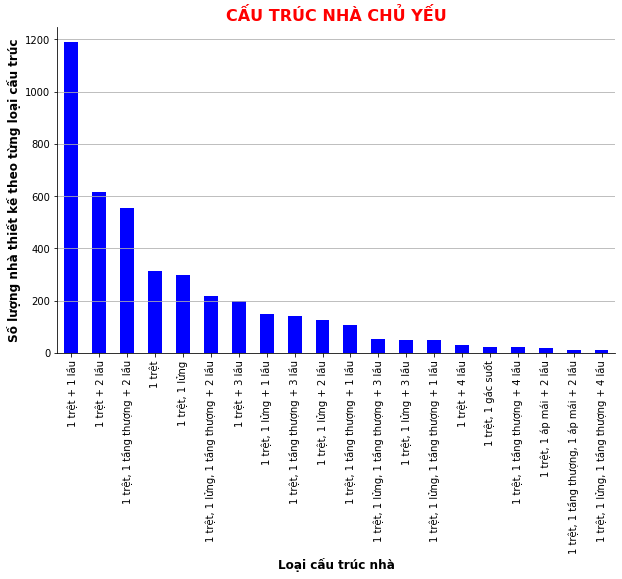

In [ ]:
plt.figure(figsize=(10,6))
data.Cau_truc.value_counts().head(20).plot(kind='bar', color='blue')
plt.title('CẤU TRÚC NHÀ CHỦ YẾU', color='r', fontsize=16, fontweight="bold")
sns.despine(top=True, right=True)
plt.grid(axis='y')
plt.xlabel('Loại cấu trúc nhà', color='k', fontsize=12,fontweight="bold")
plt.ylabel('Số lượng nhà thiết kế theo từng loại cấu trúc', color='k', fontsize=12,fontweight="bold")

**Nhận xét:** Nhà chủ yếu kết cấu dạng 1 triệt với số lầu khác nhau. Phần lớn nhà được kết cấu theo dạng 1 trệt + 1 lầu hoặc 2-3 lầu.

In [ ]:
# 9. Từ Cột cấu trúc nhà, hãy lọc ra cột So_lau thể hiện số lầu của nhà

In [127]:
data['So_lau'] = data.Cau_truc.str.extract('(\d\slầu)')

In [128]:
data['So_lau'] = data.So_lau.str.extract('(\d+)')

In [129]:
data[data.So_lau.isnull()==True]=0

In [42]:
# 10. Vẽ biểu đồ thể hiện số lầu

In [130]:
data.So_lau.value_counts()

2    1566
1    1509
0     648
3     462
4      75
5      16
7       4
6       4
8       1
Name: So_lau, dtype: int64

In [44]:
data.shape

(4285, 18)

Text(0, 0.5, 'Số lầu')

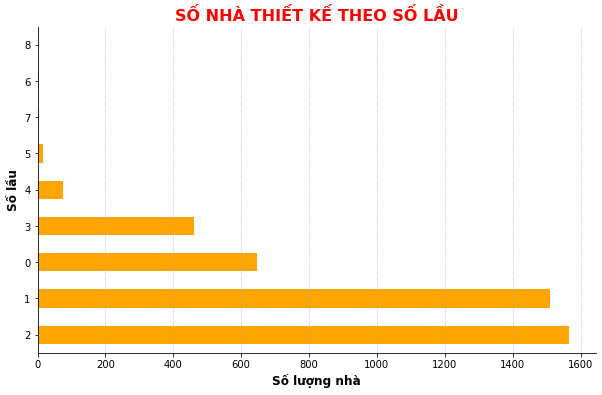

In [45]:
plt.figure(figsize=(10,6))
data.So_lau.value_counts().plot(kind='barh', color='orange')
plt.title('SỐ NHÀ THIẾT KẾ THEO SỐ LẦU', color='r', fontsize=16, fontweight="bold")
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle=':')
plt.xlabel('Số lượng nhà', color='k', fontsize=12,fontweight="bold")
plt.ylabel('Số lầu', color='k', fontsize=12,fontweight="bold")

**Nhận xét:** Nhà có kết cấu từ 1 đến 8 lầu, trong đó phần lớn nhà <2 lầu, chiếm 86.5% tổng số nhà, còn lại số ít nhà có 3 lầu trở lên.

In [46]:
# 11. Tạo biến tầng thượng, gác lửng, Tầng hầm từ cột cấu trúc nhà (Cau_truc) 

In [81]:
def new_col_contains(data, old_col, str):
  s = data[old_col].str.contains(str)
  return s

In [82]:
data['Gac_lung'] = new_col_contains(data, 'Cau_truc', 'lửng')
data['Tang_thuong'] = new_col_contains(data, 'Cau_truc', 'tầng thượng')
data['Tang_ham'] = new_col_contains(data, 'Cau_truc', 'hầm')

In [95]:
data.Tang_thuong.value_counts()

False    3085
True     1200
Name: Tang_thuong, dtype: int64

In [49]:
# 12 Đếm số nhà có cả gác lửng lẫn tầng thượng hoặc không có cả hai

In [100]:
((data['Tang_thuong']==True) & (data['Gac_lung']==True)).value_counts()

False    3940
True      345
dtype: int64

In [101]:
((data['Tang_thuong']==False) & (data['Gac_lung']==False)).value_counts()

True     2426
False    1859
dtype: int64

## TIỆN TÍCH

### WORDCLOUD

In [112]:
from wordcloud import WordCloud, STOPWORDS
from underthesea import word_tokenize

In [ ]:
# 14. Từ cột tiện tích nhà, hãy tạo dữ liệu text từ cột Tien_ich (với các từ đã được chuyển về dạng chữ thường, bỏ ký tự đặc biệt)

In [104]:
stopwords = set(STOPWORDS)

In [105]:
data.Tien_ich2 = data.Tien_ich.str.lower()

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [106]:
data.Tien_ich2 = data.Tien_ich2.str.replace('\W+', ' ')

In [107]:
data.Tien_ich2

0       gần chợ siêu thị gần bệnh viện gần công viên t...
1       gần chợ siêu thị gần bệnh viện gần công viên t...
2                                                     NaN
3                                                     NaN
4       gần công viên trung tâm di chuyển thuận tiện r...
                              ...                        
4280                                                  NaN
4281                                                  NaN
4282    gần chợ siêu thị gần công viên trung tâm hẻm t...
4283    gần chợ siêu thị gần trường học di chuyển thuậ...
4284    gần chợ siêu thị gần trường học thiết kế thông...
Name: Tien_ich, Length: 4285, dtype: object

In [108]:
text = ' '.join(x for x in data.Tien_ich2.dropna())

In [113]:
text =word_tokenize(text, format='text')

In [115]:
# text

In [ ]:
# 15. Vẽ wordcloud từ dữ liệu text vừa tạo

### wordcloud without stopword

In [122]:
wc = WordCloud(background_color='white',contour_color='red', contour_width=2, colormap='tab20').generate(text)

(-0.5, 399.5, 199.5, -0.5)

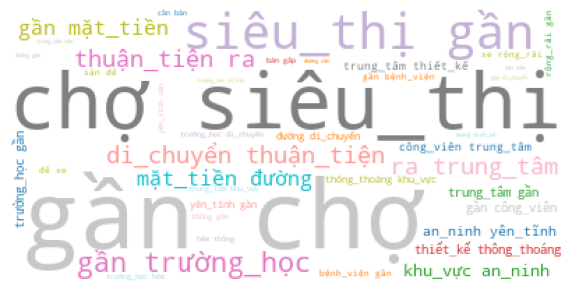

In [123]:
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')

**Nhận xét:** Phần lớn nhà có vị trí gần trung tâm, gần chợ/siêu thị.

In [ ]:
# 19. Từ Tien_ich, hãy tạo ra các cột Gan_cho, Gan_truong, Gan_congvien, Gan_mat_tien, Di_chuyen (thể hiện Di chuyển thuận tiện), Thoang (thể hiện nhà thông thoáng), an_ninh (thể hiện an ninh tốt), 2_duong_chinh (nếu nhà nằm ở vị trí giao 2 đường chính), 2_hem (nếu nhà ở vị trí giao 2 hẻm) để phân tích sâu hơn

In [124]:
data['Gan_cho'] = new_col_contains(data,'Tien_ich', 'Gần chợ, siêu thị')
data['Gan_truong'] = new_col_contains(data,'Tien_ich','Gần trường học')
data['Gan_congvien'] = new_col_contains(data,'Tien_ich','Gần công viên')
data['Gan_cho'] = new_col_contains(data,'Tien_ich','Gần chợ, siêu thị')
data['Gan_mat_tien'] = new_col_contains(data,'Tien_ich','Gần mặt tiền đường')
data['Di_chuyen'] = new_col_contains(data,'Tien_ich','Di chuyển thuận tiện')
data['Thoang'] = new_col_contains(data,'Tien_ich','Thiết kế thông thoáng')
data['an_ninh'] = new_col_contains(data,'Tien_ich','Khu vực an ninh, yên tĩnh')
data['2_duong_chinh'] = new_col_contains(data,'Tien_ich','2 Mặt đường chính')
data['2_hem'] = new_col_contains(data,'Tien_ich','2 Mặt hẻm')

In [ ]:
# 20. Lọc bỏ cột Cấu trúc và Tiện tích

In [156]:
data_final = data[['Gia', 'Nha_ve_sinh', 'So_phong', 'Huong', 'Chieu_dai', 'Rong',
       'Giay_to', 'Dien_tich', 'Dien_tich_su_dung', 'Hem_rong',
       'Duong_mat_tien', 'Duong', 'Phuong', 'Quan', 'So_lau',
       'Tang_thuong', 'Gac_lung', 'Tang_ham', 'Gan_cho', 'Gan_truong',
       'Gan_congvien', 'Gan_mat_tien', 'Di_chuyen', 'Thoang', 'an_ninh',
       '2_duong_chinh', '2_hem']]

In [157]:
# 21. Lọc lấy dữ liệu giá nhà > 0 
data_final=data_final[data_final.Gia>0]
data_final

,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Dien_tich,Dien_tich_su_dung,Hem_rong,...,Tang_ham,Gan_cho,Gan_truong,Gan_congvien,Gan_mat_tien,Di_chuyen,Thoang,an_ninh,2_duong_chinh,2_hem
0,3700,4,3,Đ.Bắc,20.71,5.00,Sổ hồng,104.5,134.7,5.00,...,False,True,True,True,True,True,True,True,False,False
1,3800,2,2,Đ.Bắc,14.35,5.00,Sổ hồng,71.8,137.6,5.00,...,False,True,True,True,False,True,True,True,False,False
2,6500,5,5,T.Nam,10.00,5.20,Sổ hồng,52.1,70.3,5.00,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54000,5,4,Đ.Bắc,30.00,12.00,Sổ đỏ,366.2,341.8,12.00,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3800,2,2,Bắc,7.81,2.95,Sổ hồng,24.0,48.0,1.50,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,5800,4,4,T.Nam,18.52,9.26,Sổ đỏ,171.6,343.2,5.00,...,False,True,True,False,False,False,False,False,False,False
4280,6600,2,2,Đ.Nam,18.00,3.00,Sổ hồng,54.4,135.0,2.50,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4281,4600,3,4,Đ.Bắc,9.37,3.00,Sổ hồng,36.5,79.9,1.78,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4282,3800,3,4,T.Nam,11.21,4.50,Sổ hồng,50.5,126.1,6.00,...,False,True,False,True,False,True,False,False,False,False


In [ ]:
# 22. Cho biết dữ liệu có dòng bị null không

In [159]:
data_final.isnull().sum()

Gia                    0
Nha_ve_sinh            0
So_phong               0
Huong                  0
Chieu_dai              0
Rong                   0
Giay_to                0
Dien_tich              0
Dien_tich_su_dung      0
Hem_rong               0
Duong_mat_tien         0
Duong                  0
Phuong                 0
Quan                   0
So_lau                 0
Tang_thuong            0
Gac_lung               0
Tang_ham               0
Gan_cho              693
Gan_truong           693
Gan_congvien         693
Gan_mat_tien         693
Di_chuyen            693
Thoang               693
an_ninh              693
2_duong_chinh        693
2_hem                693
dtype: int64

<h1 style='color:blue;'><b>EXPLORATORY DATA ANALYSIS</b></h1>

In [160]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 0 to 4283
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gia                3636 non-null   int64  
 1   Nha_ve_sinh        3636 non-null   int64  
 2   So_phong           3636 non-null   int64  
 3   Huong              3636 non-null   object 
 4   Chieu_dai          3636 non-null   float64
 5   Rong               3636 non-null   float64
 6   Giay_to            3636 non-null   object 
 7   Dien_tich          3636 non-null   float64
 8   Dien_tich_su_dung  3636 non-null   float64
 9   Hem_rong           3636 non-null   float64
 10  Duong_mat_tien     3636 non-null   int64  
 11  Duong              3636 non-null   object 
 12  Phuong             3636 non-null   object 
 13  Quan               3636 non-null   object 
 14  So_lau             3636 non-null   object 
 15  Tang_thuong        3636 non-null   object 
 16  Gac_lung           3636 

In [171]:
# 23. Tạo danh sách categories (chứa biến phân loại nếu số lượng unique() <=10) 
categories = [col for col in data_final.columns if (data_final[col].dtype=='object')or(len(data_final[col].unique()))<10]

In [172]:
categories

['Huong',
 'Giay_to',
 'Duong_mat_tien',
 'Duong',
 'Phuong',
 'Quan',
 'So_lau',
 'Tang_thuong',
 'Gac_lung',
 'Tang_ham',
 'Gan_cho',
 'Gan_truong',
 'Gan_congvien',
 'Gan_mat_tien',
 'Di_chuyen',
 'Thoang',
 'an_ninh',
 '2_duong_chinh',
 '2_hem']

In [163]:
# 24 Hãy chuyển tất cả các biến phân loại thành kiểu object

In [173]:
for col in categories:
    data_final[col] = data_final[col].astype('object')

In [174]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 0 to 4283
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gia                3636 non-null   int64  
 1   Nha_ve_sinh        3636 non-null   int64  
 2   So_phong           3636 non-null   int64  
 3   Huong              3636 non-null   object 
 4   Chieu_dai          3636 non-null   float64
 5   Rong               3636 non-null   float64
 6   Giay_to            3636 non-null   object 
 7   Dien_tich          3636 non-null   float64
 8   Dien_tich_su_dung  3636 non-null   float64
 9   Hem_rong           3636 non-null   float64
 10  Duong_mat_tien     3636 non-null   object 
 11  Duong              3636 non-null   object 
 12  Phuong             3636 non-null   object 
 13  Quan               3636 non-null   object 
 14  So_lau             3636 non-null   object 
 15  Tang_thuong        3636 non-null   object 
 16  Gac_lung           3636 

In [166]:
# 25. Chuyển kiểu dữ liệu cột 'So_lau' thành kiểu int

In [175]:
data_final.columns

Index(['Gia', 'Nha_ve_sinh', 'So_phong', 'Huong', 'Chieu_dai', 'Rong',
       'Giay_to', 'Dien_tich', 'Dien_tich_su_dung', 'Hem_rong',
       'Duong_mat_tien', 'Duong', 'Phuong', 'Quan', 'So_lau', 'Tang_thuong',
       'Gac_lung', 'Tang_ham', 'Gan_cho', 'Gan_truong', 'Gan_congvien',
       'Gan_mat_tien', 'Di_chuyen', 'Thoang', 'an_ninh', '2_duong_chinh',
       '2_hem'],
      dtype='object')

In [168]:
data_final.Duong_mat_tien.value_counts()

0    2767
1     869
Name: Duong_mat_tien, dtype: int64

In [176]:
data_final['So_lau'] = data_final['So_lau'].astype('int')

In [179]:
bool_cols = ['Tang_thuong', 'Gac_lung', 'Tang_ham', 'Gan_cho', 'Gan_truong','Gan_congvien','Gan_mat_tien', 'Di_chuyen', 'Thoang', 'an_ninh', '2_duong_chinh', '2_hem']
for col in bool_cols:
  data_final[col] = data_final[col].astype('bool')
  data_final[col] = data_final[col].apply(lambda x: 1 if x==True else 0)


In [180]:
data_final.Gac_lung

0       0
1       0
2       1
3       0
4       0
       ..
4279    0
4280    0
4281    0
4282    0
4283    0
Name: Gac_lung, Length: 3636, dtype: int64

In [181]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 0 to 4283
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gia                3636 non-null   int64  
 1   Nha_ve_sinh        3636 non-null   int64  
 2   So_phong           3636 non-null   int64  
 3   Huong              3636 non-null   object 
 4   Chieu_dai          3636 non-null   float64
 5   Rong               3636 non-null   float64
 6   Giay_to            3636 non-null   object 
 7   Dien_tich          3636 non-null   float64
 8   Dien_tich_su_dung  3636 non-null   float64
 9   Hem_rong           3636 non-null   float64
 10  Duong_mat_tien     3636 non-null   object 
 11  Duong              3636 non-null   object 
 12  Phuong             3636 non-null   object 
 13  Quan               3636 non-null   object 
 14  So_lau             3636 non-null   int32  
 15  Tang_thuong        3636 non-null   int64  
 16  Gac_lung           3636 

In [ ]:
# 26 Hãy tạo danh sách numbers (chứa biến định lượng với các biến chứa kiểu khác object) 

In [182]:
numbers = [col for col in (data_final.columns) if (data_final[col].dtype!='object')]

In [ ]:
numbers

['Gia',
 'Nha_ve_sinh',
 'So_phong',
 'Chieu_dai',
 'Rong',
 'Dien_tich',
 'Dien_tich_su_dung',
 'Hem_rong',
 'So_lau']

# Chuyen bien object thanh category

In [ ]:
df = data[data['region']!='TotalUS']

## Label categorical data
def convert_string_into_numeric(dataframe, columns):
    lookup = dict()
    for column in columns:
        index_column = df.columns.get_loc(column)
        string_values = dataframe.iloc[:,index_column].unique()
        lookup_column = dict()
        for i, string_value in enumerate(string_values):
            lookup_column[string_value] = i
            index_string_values = np.where(dataframe.iloc[:,index_column] == string_value)[0]
            dataframe.iloc[index_string_values,index_column] = i
        lookup[column] = lookup_column
    return lookup

lookup = convert_string_into_numeric(df, ['type', 'region'])

In [ ]:
# 27. Vẽ heatmap thể hiện mối tương quan giữa các numbers

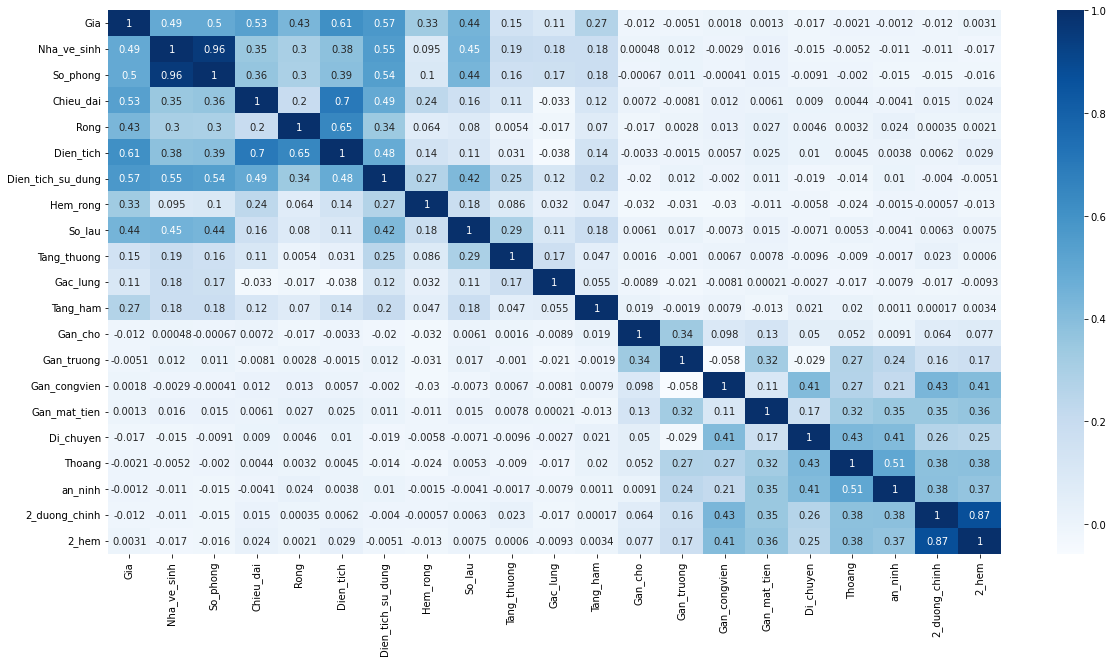

In [187]:
plt.figure(figsize=(20,10))
sns.heatmap(data_final[numbers].corr(), annot=True, cmap='Blues', )
plt.savefig('heat.png')

**Nhận xét:** Giá nhà có liên quan tới Diện tích nhà, chiều dài, chiều rộng, số phòng, Số nhà vệ sinh, và độ rộng đường hẻm xung quanh nhà, số lầu theo cấu trúc nhà. Các yếu tố tiện ích như Gần chợ, gần trường, siêu thị, công viên, thuận tiện di chuyển, thoáng mát, an ninh không có ảnh hưởng nhiều tới giá nhà.

In [ ]:
# 28. Vẽ biểu đồ thể hiện mối liên quan giữa một số biến phân loại với giá nhà như sau:

In [189]:
from matplotlib import gridspec

C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


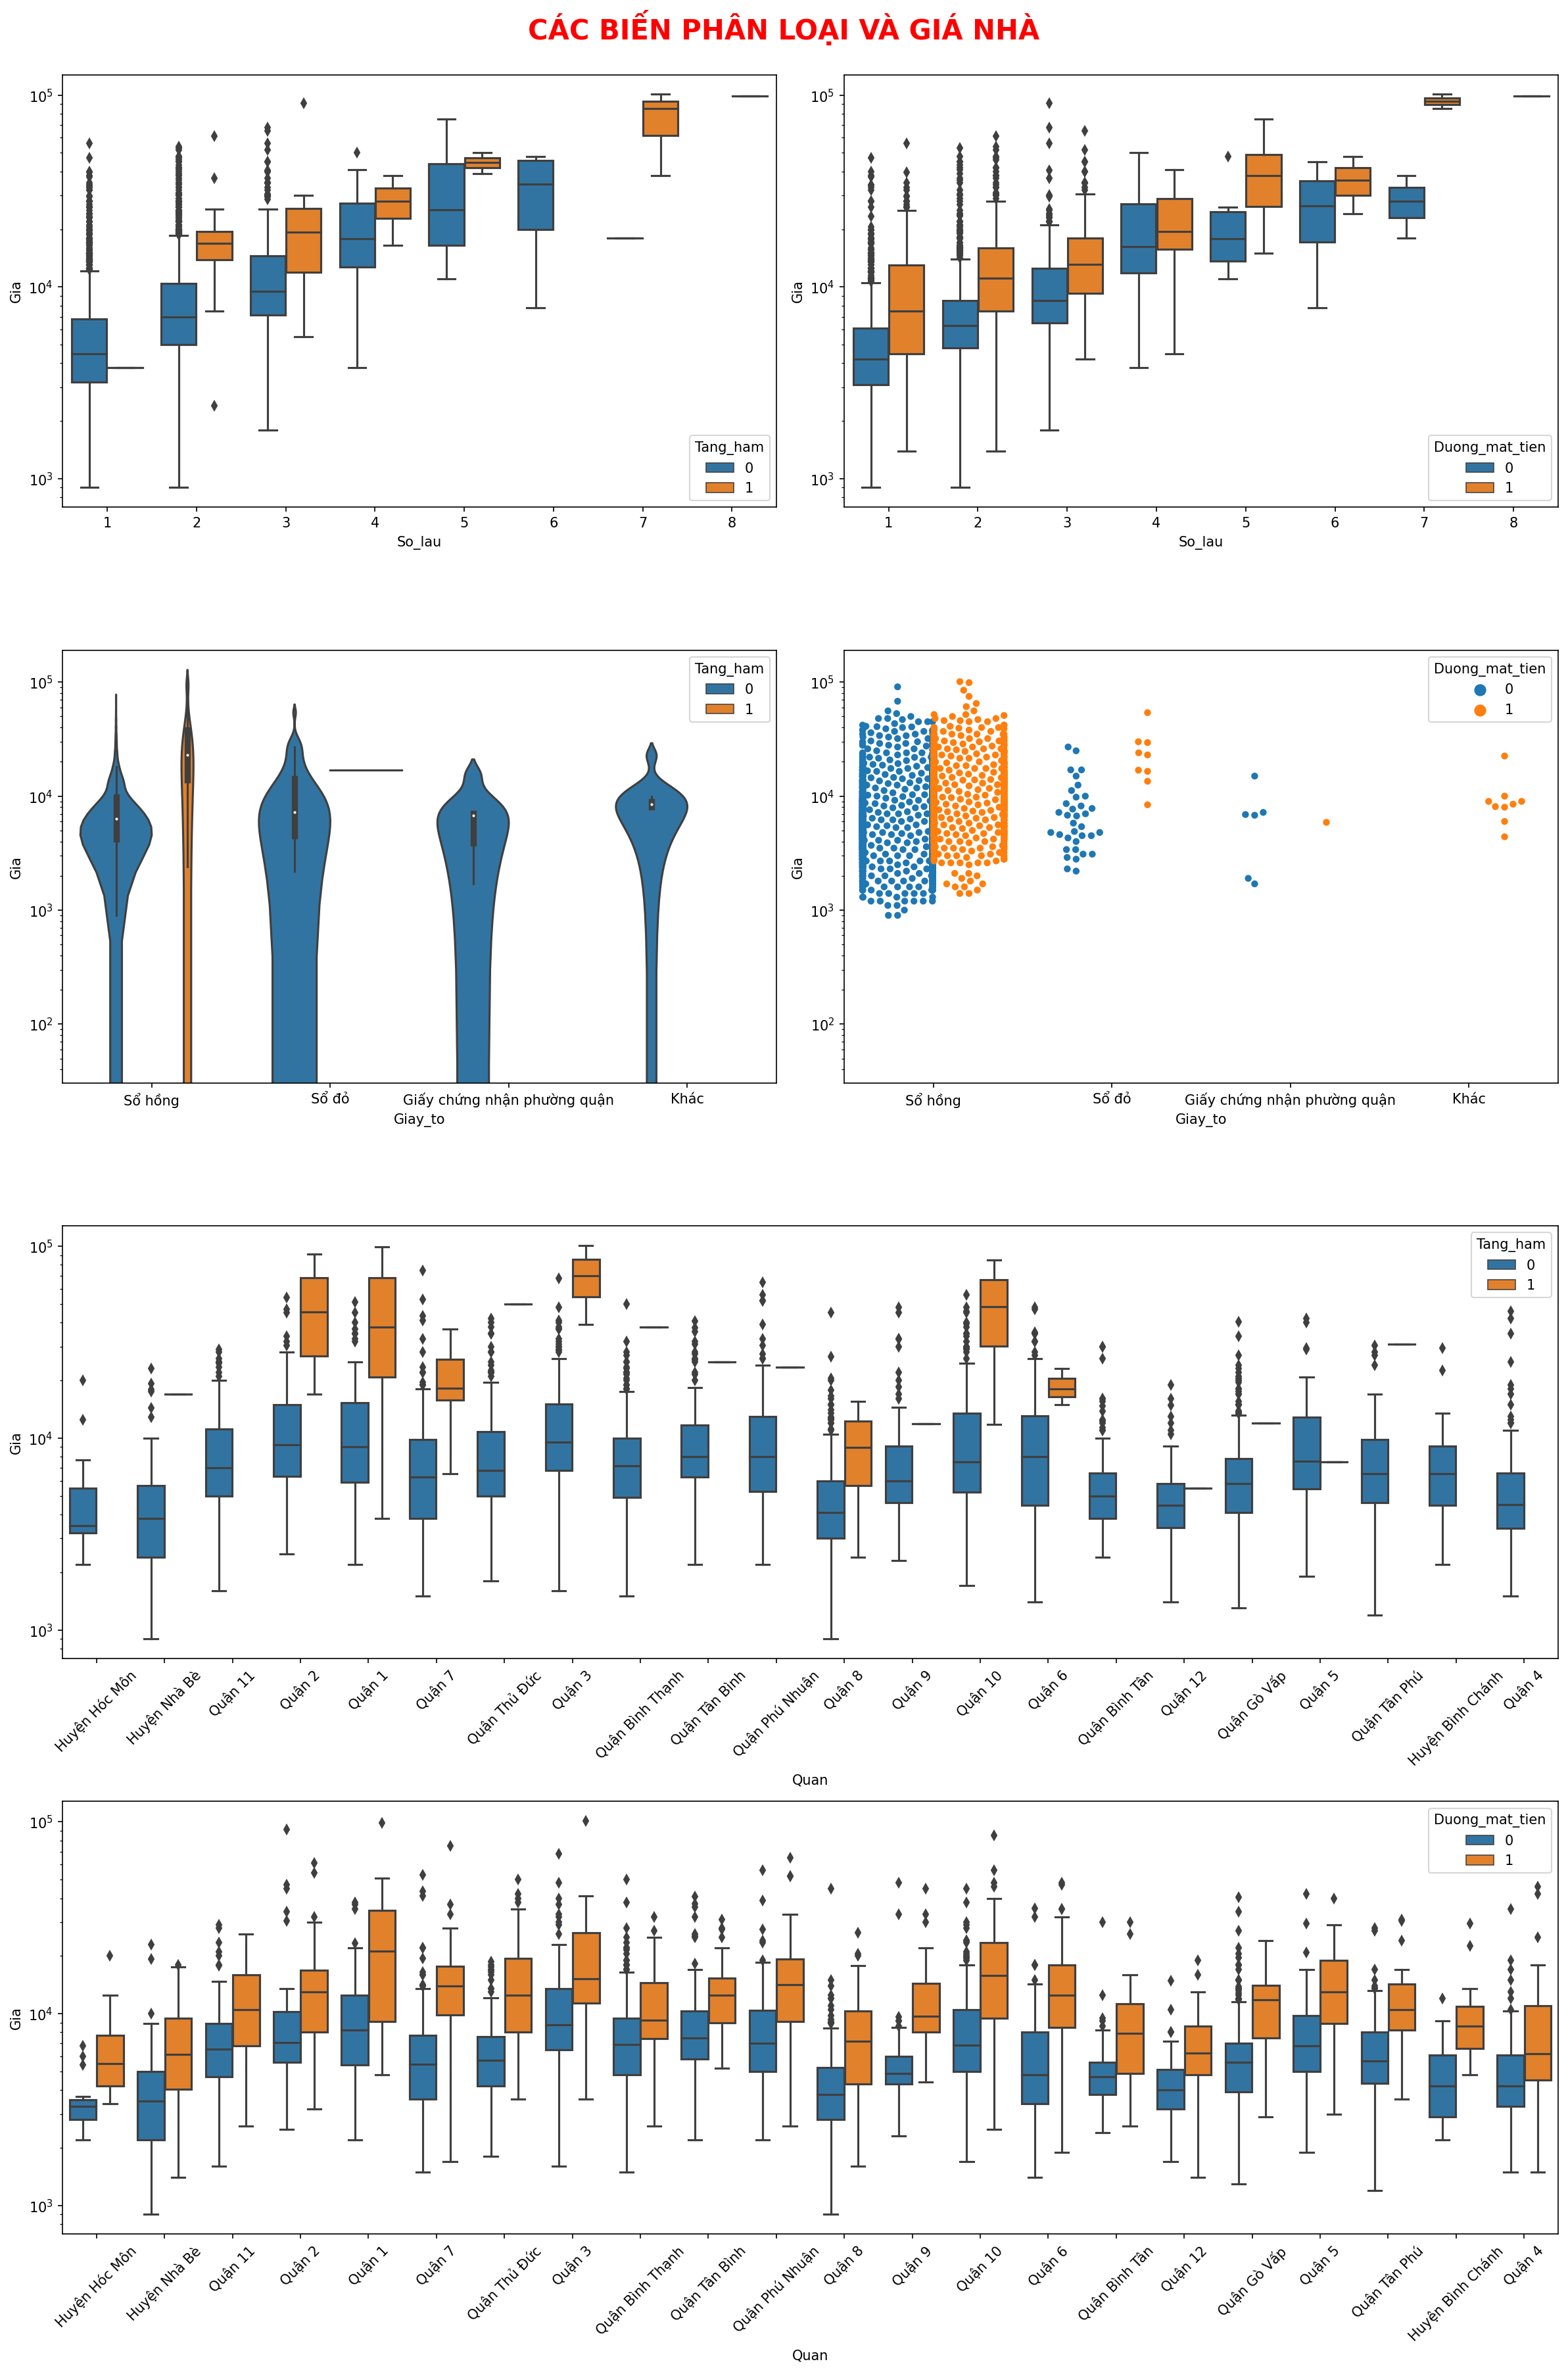

In [190]:
fig = plt.figure(tight_layout=True, figsize=(16,24), dpi=150)
gs=gridspec.GridSpec(4,2)
ax1 = fig.add_subplot(gs[0,0])
sns.boxplot(data=data_final, x='So_lau', y='Gia', ax=ax1, hue='Tang_ham')
ax1.set_yscale('log')
ax2 = fig.add_subplot(gs[0,1], sharey=ax1)
sns.boxplot(data=data_final, x='So_lau', y='Gia', ax=ax2, hue='Duong_mat_tien')
ax3 = fig.add_subplot(gs[1,0])
sns.violinplot(data=data_final, x='Giay_to', y = 'Gia', hue='Tang_ham', ax=ax3, dodge=True)
ax3.set_yscale('log')
ax4 = fig.add_subplot(gs[1,1], sharey=ax3)
sns.swarmplot(data=data_final, x='Giay_to', y = 'Gia', hue='Duong_mat_tien', ax=ax4, dodge=True)
ax5 = fig.add_subplot(gs[2, :])
sns.boxplot(data=data_final, x='Quan', y='Gia', ax=ax5, hue='Tang_ham')
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)
ax5.set_yscale('log')
ax6 = fig.add_subplot(gs[3, :])
sns.boxplot(data=data_final, x='Quan', y='Gia', ax=ax6, hue='Duong_mat_tien')
for tick in ax6.get_xticklabels():
    tick.set_rotation(45)
ax6.set_yscale('log')
plt.tight_layout()
plt.suptitle('CÁC BIẾN PHÂN LOẠI VÀ GIÁ NHÀ', color='r', fontsize=20, fontweight="bold",y=1.)
plt.tight_layout()
plt.savefig('cat.png')


**Nhận xét:** 

* Biểu đồ 1 cho thấy
    * Nhà có càng nhiều lầu thì giá càng cao
    * Thường những nhà có hầm thường đều có cấu trúc >= 2 lầu trở lên
    * Nhà có tầng hầm giá thường có mức giá cao hơn nhà không có hầm
* Biểu đồ 2 cho thấy
    * Nhà có càng nhiều lầu thì giá càng cao
    * Nhà nằm ở đường mặt tiền mức giá cao hơn so với nhà ở đường khác
* Biểu đồ 3 cho thấy
    * Hầu hết các nhà có hầm đều có sổ hồng, chỉ có 1 trường hợp khác có hầm nhưng giấy tờ là sổ đỏ.
    * Mức giá và loại giấy tờ không liên quan tới nhau nhiều
* Biểu đồ 4 cho thấy
    * Đa số nhà ở HCM đều có sổ hồng hoặc sổ đỏ
* Biểu đồ 5 cho thấy
    * Chỉ một số quận có nhà xây tầng hầm như Quận 1,2,3,7,8,10,6
    * Nhà có tầng hầm giá cao hơn hẳn so với nhà không có hầm
    * Nhà ở các quận 1,2 giá cao hơn các quận 3, 6,10. Nhà ở các quận này giá cao hơn nhà ở các quận như Hooc Môn, Nhà Bè, Bình Chánh, Quận 8 (do vị trí ở Trung tâm và gần ngoại ô)
* Biểu đồ 6 cho thấy
    * Nhà ở đường mặt tiền giá cao hơn nhà ở đường khác
    * Nhà ở các quận 1,2 giá cao hơn các quận 3, 6,10. Nhà ở các quận này giá cao hơn nhà ở các quận như Hooc Môn, Nhà Bè, Bình Chánh, Quận 8 (do vị trí ở Trung tâm và gần ngoại ô)

## Khảo sát giá nhà theo địa chỉ

In [203]:
# 29. Vẽ biểu đồ thể hiện số lượng nhà theo quận
data_final.Quan.value_counts().reset_index()

,index,Quan
0,Quận 8,367
1,Quận Gò Vấp,330
2,Quận Bình Thạnh,270
3,Quận 10,269
4,Quận Thủ Đức,222
5,Quận Tân Bình,208
6,Quận 6,202
7,Quận 7,198
8,Quận Phú Nhuận,197
9,Quận 3,170


Text(0, 0.5, 'Quận')

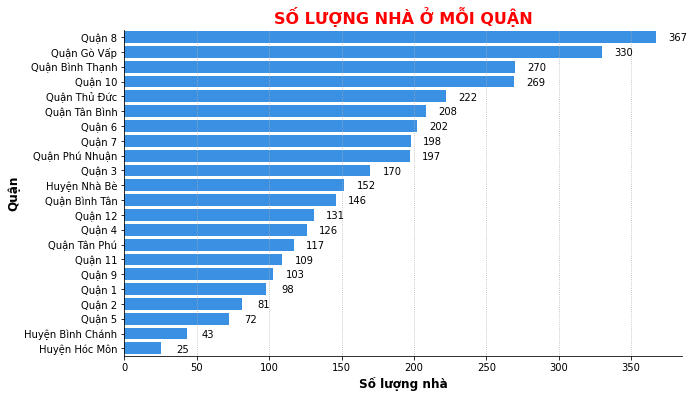

In [208]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = data_final.Quan.value_counts().reset_index(), y=data_final.Quan.value_counts().index, x=data_final.Quan.value_counts(), color='dodgerblue')
for p in ax.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.title('SỐ LƯỢNG NHÀ Ở MỖI QUẬN', color='r', fontsize=16, fontweight="bold")
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle=':')
plt.xlabel('Số lượng nhà', color='k', fontsize=12,fontweight="bold")
plt.ylabel('Quận', color='k', fontsize=12,fontweight="bold")

**Nhận xét:** Nhà ở tập trung chủ yếu tại các quận xa trung tâm như Quận 8, Gò Vấp, Bình Thạnh, Thủ Đức, Tân Bình, Quận 6. Ở các quận gần trung tâm thường ít nhà ở (Quận 5, quận 1) hoặc ở các quận rất xa trung tâm như Bình Chánh, Hoc Môn cũng ít dữ liệu nhà ở.

In [280]:
# 30. Vẽ biểu đồ thể hiện top 20 đường chính có số lượng nhà nhiều nhất
for_plot=data_final.groupby('Duong').count().iloc[:,0].sort_values()
for_plot

Duong
lý phục man              1
lưu quý kỳ               1
lưu nhân chú             1
tch 10                   1
tuy lý vương             1
                      ... 
cách mạng tháng tám     44
quang trung             47
phạm thế hiển           50
lê văn lương            52
huỳnh tấn phát         114
Name: Gia, Length: 871, dtype: int64

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

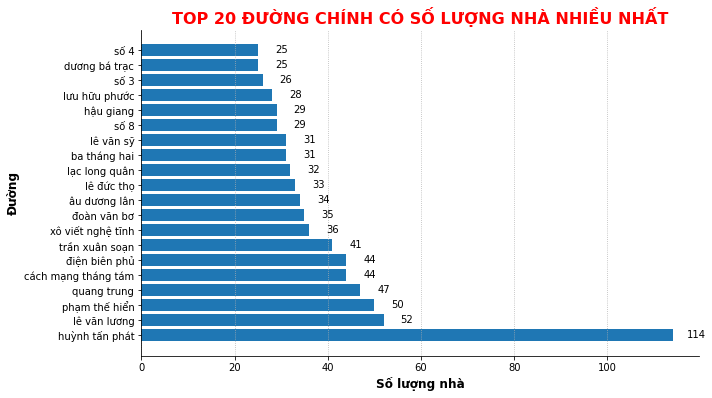

In [275]:
plt.figure(figsize=(10,6))
ax = plt.barh(width=for_plot.values, y=for_plot.index)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.title('TOP 20 ĐƯỜNG CHÍNH CÓ SỐ LƯỢNG NHÀ NHIỀU NHẤT', color='r', fontsize=16, fontweight="bold")
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle=':')
plt.ylabel('Đường', color='k', fontsize=12,fontweight="bold")
plt.xlabel('Số lượng nhà', color='k', fontsize=12,fontweight="bold")
plt.xticks()

**Nhận xét:** Số lượng nhà nhiều ở các đường dài và lớn như Huỳnh Tấn Phát, Lê Văn Lương, Phạm Thế Hiển, Quang Trung, Điện Biên Phủ, Cách Mạng Tháng 8, Trần Xuân Soạn, Xô Viết Nghệ Tĩnh

In [ ]:
# 32. Cho biết dữ liệu có dòng trùng không

In [283]:
data_final.duplicated().value_counts()

False    3636
dtype: int64

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 0 to 4283
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gia                3636 non-null   int64  
 1   Nha_ve_sinh        3636 non-null   int64  
 2   So_phong           3636 non-null   int64  
 3   Huong              3636 non-null   object 
 4   Chieu_dai          3636 non-null   float64
 5   Rong               3636 non-null   float64
 6   Giay_to            3636 non-null   object 
 7   Dien_tich          3636 non-null   float64
 8   Dien_tich_su_dung  3636 non-null   float64
 9   Hem_rong           3636 non-null   float64
 10  Duong_mat_tien     3636 non-null   object 
 11  Duong              3636 non-null   object 
 12  Phuong             3636 non-null   object 
 13  Quan               3636 non-null   object 
 14  So_lau             3636 non-null   int32  
 15  Tang_thuong        3636 non-null   object 
 16  Gac_lung           3636 

In [ ]:
# 33. Thống kê giá nhà trung bình theo quận

In [284]:
gr_Quan = data_final.groupby('Quan').agg({'Gia':'mean',
                                   'So_lau':'mean',
                                   'So_phong':'mean',
                                   'Nha_ve_sinh':'mean',
                                            'Dien_tich':'mean',
                                            'Hem_rong':'mean'})
gr_Quan.sort_values(['Gia','Dien_tich'], ascending=[False, False]).round(2)

,Gia,So_lau,So_phong,Nha_ve_sinh,Dien_tich,Hem_rong
Quan,,,,,,
Quận 2,14395.06,1.84,4.46,4.54,120.44,7.71
Quận 3,13347.06,2.32,4.57,4.25,53.75,6.24
Quận 1,13292.86,2.08,4.54,4.40,42.48,5.49
Quận 10,11187.73,2.00,3.96,3.67,46.46,7.14
Quận Phú Nhuận,10697.46,1.95,4.06,3.95,53.43,5.54
Quận 5,10231.94,1.76,3.72,3.43,41.68,6.80
Quận 6,10118.32,1.77,3.69,3.34,64.74,8.02
Quận Tân Bình,9921.63,1.89,4.49,4.20,65.25,5.82
Quận 11,9378.90,1.74,3.56,2.93,48.51,9.70


**Nhận xét:** Giá nhà trung bình cao phụ thuộc Quận hơn là diện tích nhà (yếu tố quận quan trọng hơn diện tích), ở các Quận trung tâm như Quận 2, Quận 3, Quận 1, Quận 10, Quận Phú Nhuận có giá nhà trung bình cao. Trong khi giá trung bình nhà ở của các quận xa trung tâm như Nhà Bè, Quận 12, Quận 8, Hooc Môn, Bình Tân... thấp hơn

In [ ]:
# 34. Thống kê giá nhà

In [286]:
gr_duong = data_final.groupby('Tang_thuong').agg({'Gia':'mean',
                                   'So_lau':'mean',
                                   'So_phong':'mean',
                                   'Nha_ve_sinh':'mean',
                                            'Dien_tich':'mean',
                                            'Hem_rong':'mean'})
gr_duong.sort_values(['Gia','Dien_tich'], ascending=[False, False])

,Gia,So_lau,So_phong,Nha_ve_sinh,Dien_tich,Hem_rong
Tang_thuong,,,,,,
1,10272.871452,2.121035,4.806344,4.739566,66.794491,6.900935
0,7843.478261,1.609516,3.503281,3.199754,62.882445,5.870585


**Nhận xét:** Các yếu tố khác liên quan tới giá nhà sau yếu tố quận là Diện tích (lớn hơn thì giá cao hơn), Hẻm rộng hơn thì giá cao hơn, Số lauaf nhiều hơn thì giá cao hơn, số phòng và số phòng vệ sinh nhiều hơn thì giá cao hơn

In [ ]:
# 35. Thống kê giá nhà theo Tang_ham

In [292]:
gr_ham = data_final.groupby('Tang_ham').agg({'Gia':'mean',
                                   'So_lau':'mean',
                                   'So_phong':'mean',
                                   'Nha_ve_sinh':'mean',
                                            'Dien_tich':'mean',
                                            'Hem_rong':'mean'}).sort_values(by='Gia', ascending=False)
gr_ham

,Gia,So_lau,So_phong,Nha_ve_sinh,Dien_tich,Hem_rong
Tang_ham,,,,,,
1,30411.764706,3.294118,10.941176,10.676471,149.944118,8.929412
0,8438.450861,1.763742,3.866463,3.641310,63.361771,6.184399


**Nhận xét:** Bảng trên cho thấy giá nhà có hầm giá trung bình cao hơn (gấp 1.5 lần), số lầu trung bình ở những nhà có xây hầm là 3 (so với nhà không có hầm khoảng 1 - 2 lầu). Các nhà xây hầm có lẽ thường lớn nên số phòng và số nhà vệ sinh nhiều (>10) so với nhà không xây hầm (<4). Trung bình độ rộng hẻm ở các nhà có hầm cũng rộng hơn so với nhà không có hầm

In [ ]:
# 36. Thống kê giá nhà theo số lầu

In [293]:
gr_solau = data_final.groupby('So_lau').agg({'Gia':'mean',
                                   'So_phong':'mean',
                                   'Nha_ve_sinh':'mean'}).sort_values(by='Gia', ascending=False)
gr_solau

,Gia,So_phong,Nha_ve_sinh
So_lau,,,
8,99000.000000,26.000000,27.000000
7,60500.000000,14.750000,13.500000
5,32893.750000,15.812500,14.875000
6,31200.000000,19.500000,18.750000
4,20412.000000,10.026667,9.746667
3,12371.861472,5.926407,5.848485
2,8922.108626,4.081789,3.935463
1,6114.910537,2.654076,2.314778


**Nhận xét:** Nhà có số lầu càng nhiều thì giá càng cao, số phòng và số nhà vệ sinh cũng nhiều theo số lầu

In [ ]:
# 37. Thống kê giá nhà theo vị trí

In [296]:
gr_mattien = data_final.groupby('Duong_mat_tien').agg({'Gia':'mean',
                                   'So_lau':'mean',
                                   'So_phong':'mean',
                                   'Nha_ve_sinh':'mean',
                                            'Dien_tich':'mean',
                                            'Hem_rong':'mean'}).sort_values(by='Gia', ascending = False)
gr_mattien

,Gia,So_lau,So_phong,Nha_ve_sinh,Dien_tich,Hem_rong
Duong_mat_tien,,,,,,
1,13570.195627,2.017261,4.644419,4.387802,84.421059,13.101300
0,7096.783520,1.702927,3.709071,3.493314,57.811818,4.045817


**Nhận xét:** So với các nhà ở vị trí khác thì giá nhà ở đường mặt tiền giá trung bình, diện tích trung bình và độ rộng hẻm cao hơn gấp 2-3 lần, các đặc điểm khác như số lầu, số phòng, nhà vệ sinh cũng nhiều hơn.

In [ ]:
# 38. Vẽ biểu đồ thể hiện phân bố giá nhà như sau

In [ ]:
data_final.Gia.describe()

count      3636.000000
mean       8643.921892
std        7874.221268
min         900.000000
25%        4200.000000
50%        6400.000000
75%       10000.000000
max      101000.000000
Name: Gia, dtype: float64

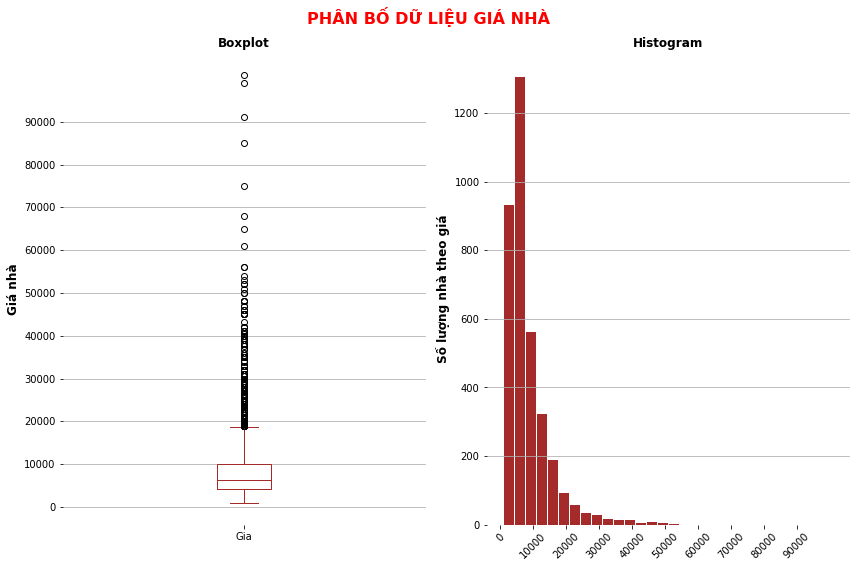

In [297]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
data_final.Gia.plot(kind='box', ax=ax1, color='brown')
data_final.Gia.plot(kind='hist', ax=ax2, color='brown', bins=30, edgecolor='white')
plt.suptitle('PHÂN BỐ DỮ LIỆU GIÁ NHÀ', color='r', fontsize=16, fontweight="bold")
ax1.set_title('Boxplot', color='k', fontsize=12,fontweight="bold")
ax1.set_ylabel('Giá nhà',color='k', fontsize=12,fontweight="bold")
ax2.set_title('Histogram', color='k', fontsize=12,fontweight="bold")
ax2.set_ylabel('Số lượng nhà theo giá',color='k', fontsize=12,fontweight="bold")
sns.despine(bottom=True,right=True, left=True)
ax1.set_yticks(np.arange(0, 100000, 10000))
ax2.set_xticks(np.arange(0, 100000, 10000))
ax2.set_xticklabels(np.arange(0, 100000, 10000),rotation=45)
ax1.grid(axis='y')
ax2.grid(axis='y')
plt.tight_layout()

<b>NOTES</b>Giá nhà ở TP. HCM thấp nhất là 900 triệu. Phần lớn nhà có giá dưới 10 tỷ (75%). Hầu hết nhà ở TP. HCM có giá dưới 20 tỷ.

In [ ]:
# 39. Đếm xem số lượng outliers theo giá nhà

In [298]:
q1, q3 = np.percentile(data_final.Gia, 25, axis=0), np.percentile(data_final.Gia, 75, axis=0)
iqr = q3 - q1
outliers = 1.5*iqr+q3
outliers

18700.0

In [299]:
print('Số lượng outliers theo Giá nhà: ', len(data_final[data_final.Gia>outliers]))
print('Tỷ lệ outliers theo Giá nhà: ', str(round(len(data_final[data_final.Gia>outliers])/data_final.shape[0]*100,2)) + ' %')

Số lượng outliers theo Giá nhà:  268
Tỷ lệ outliers theo Giá nhà:  7.37 %


In [ ]:
# 40. Vẽ biểu đồ thể hiện phân bố diện tích nhà như sau

In [ ]:
data_final.Dien_tich.describe()

count    3636.000000
mean       64.171397
std        58.498903
min         4.700000
25%        35.075000
50%        52.000000
75%        75.325000
max      1295.900000
Name: Dien_tich, dtype: float64

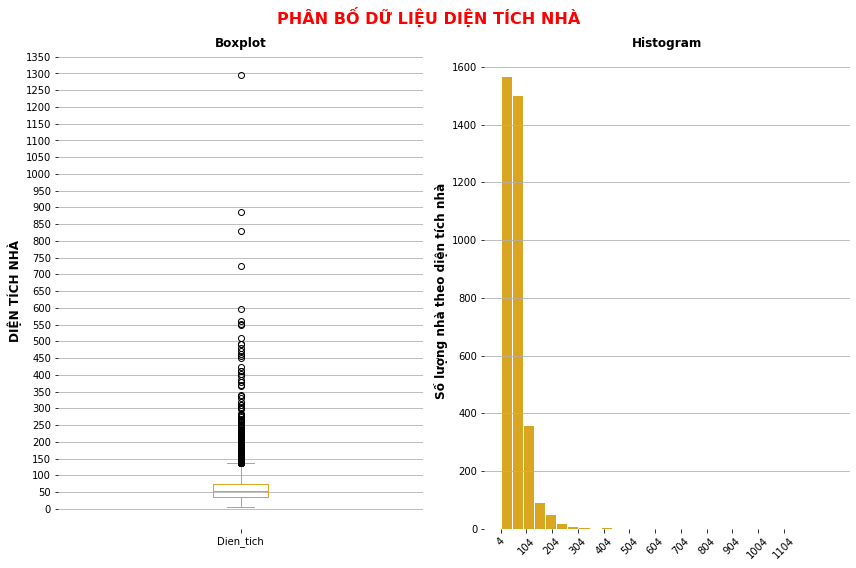

In [300]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
data_final.Dien_tich.plot(kind='box', ax=ax1, color='goldenrod')
data_final.Dien_tich.plot(kind='hist', ax=ax2, color='goldenrod', bins=30, edgecolor='white')
plt.suptitle('PHÂN BỐ DỮ LIỆU DIỆN TÍCH NHÀ', color='r', fontsize=16, fontweight="bold")
ax1.set_title('Boxplot', color='k', fontsize=12,fontweight="bold")
ax1.set_ylabel('DIỆN TÍCH NHÀ',color='k', fontsize=12,fontweight="bold")
ax2.set_title('Histogram', color='k', fontsize=12,fontweight="bold")
ax2.set_ylabel('Số lượng nhà theo diện tích nhà',color='k', fontsize=12,fontweight="bold")
sns.despine(bottom=True,right=True, left=True)
ax1.set_yticks(np.arange(0, 1400, 50))
ax2.set_xticks(np.arange(4, 1200, 100))
ax2.set_xticklabels(np.arange(4, 1200, 100),rotation=45)
ax1.grid(axis='y')
ax2.grid(axis='y')
plt.tight_layout()

**Nhận xét:** Nhà ở HCM phần lớn có diện tích khoảng từ 5 đến 150 m2.

In [301]:
#41. Đếm xem số lượng outliers theo diện tích nhà

In [302]:
q1, q3 = np.percentile(data_final.Dien_tich, 25, axis=0), np.percentile(data_final.Dien_tich, 75, axis=0)
iqr = q3 - q1
outliers = 1.5*iqr+q3
outliers

135.69999999999996

In [303]:
print('Số lượng outliers theo diện tích nhà: ', len(data_final[data_final.Dien_tich>outliers]))
print('Tỷ lệ outliers theo diện tích nhà: ', str(round(len(data_final[data_final.Dien_tich>outliers])/data_final.shape[0]*100,2)) + ' %')

Số lượng outliers theo diện tích nhà:  198
Tỷ lệ outliers theo diện tích nhà:  5.45 %


In [304]:
# 42. Tạo pivot table thống kê dữ liệu Số lầu, Hướng nhà và số lượng nhà như sau

In [305]:
pivot = pd.pivot_table(index='So_lau', columns='Huong', values='Gia', data=data_final, aggfunc='count')

In [306]:
pivot

Huong,Bắc,Không xác định,Nam,T.Bắc,T.Nam,Tây,Đ.Bắc,Đ.Nam,Đông
So_lau,,,,,,,,,
1,110.0,12.0,127.0,249.0,247.0,106.0,242.0,266.0,150.0
2,117.0,13.0,134.0,312.0,245.0,99.0,258.0,285.0,102.0
3,36.0,4.0,35.0,101.0,69.0,30.0,73.0,75.0,39.0
4,2.0,1.0,7.0,12.0,16.0,5.0,9.0,17.0,6.0
5,2.0,NaN,1.0,5.0,3.0,NaN,2.0,3.0,NaN
6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [310]:
# 44. Vẽ biểu đồ thể hiện mối quan hệ giữa số lầu, hướng nhà và số lượng nhà như sau

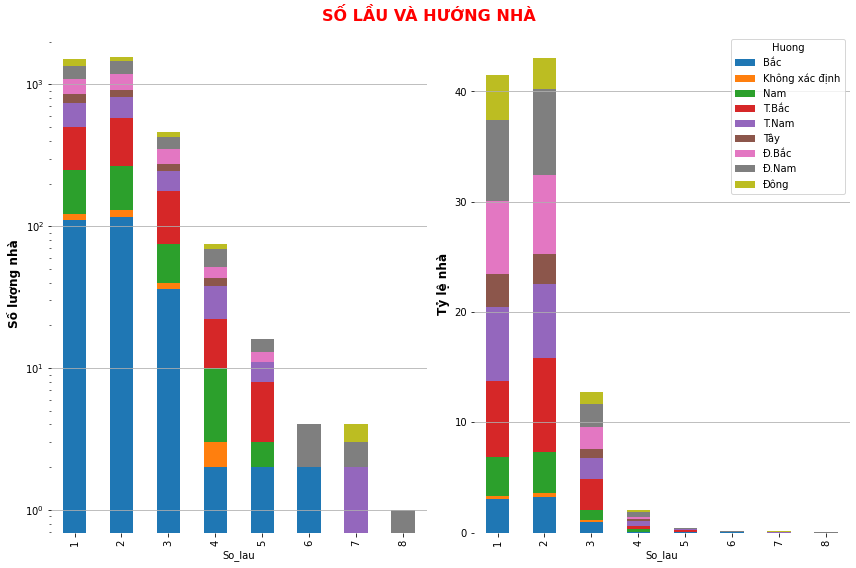

In [311]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
pivot.plot(kind='bar', stacked=True,ax=ax1, legend=None)
ax1.set_yscale('log')
pivot_percentage.plot(kind='bar', stacked=True,ax=ax2)
# plt.yscale('log')
# plt.legend(loc=1, bbox_to_anchor=(1.4,1))
plt.suptitle('SỐ LẦU VÀ HƯỚNG NHÀ', color='r', fontsize=16, fontweight="bold")
# ax1.set_title('Boxplot', color='k', fontsize=12,fontweight="bold")
ax1.set_ylabel('Số lượng nhà',color='k', fontsize=12,fontweight="bold")
# ax2.set_title('Histogram', color='k', fontsize=12,fontweight="bold")
ax2.set_ylabel('Tỷ lệ nhà',color='k', fontsize=12,fontweight="bold")
sns.despine(bottom=True,right=True, left=True)
ax1.grid(axis='y')
ax2.grid(axis='y')
plt.tight_layout()

**Nhận xét:** Nhà ở HCM được thiết kế chủ yếu hướng về phí Bắc, Nam, Tây Băc, Tây Nam, Đông Nam. Số ít khác thiết kế xoay về hướng Tây hoặc Đông.

In [312]:
# 45. Đếm số lượng nhà theo loại giấy tờ

In [313]:
data_final.Giay_to.value_counts()

Sổ hồng                        3576
Sổ đỏ                            44
Khác                              9
Giấy chứng nhận phường quận       7
Name: Giay_to, dtype: int64

In [ ]:
# 46. Vẽ swarmplot thể hiện giá nhà theo loại giấy tờ

Text(0.5, 1.0, 'GIÁ NHÀ THEO LOẠI GIẤY TỜ')

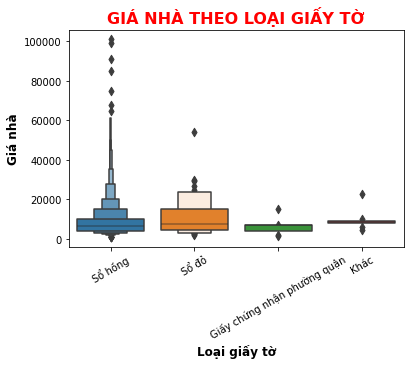

In [317]:
sns.boxenplot(data=data_final, x='Giay_to', y='Gia')
plt.xticks(rotation='30')
plt.xlabel('Loại giấy tờ', fontweight='bold', fontsize=12)
plt.ylabel('Giá nhà', fontweight='bold', fontsize=12)
plt.title('GIÁ NHÀ THEO LOẠI GIẤY TỜ', color='r', fontweight='bold', fontsize=16)

**Nhận xét:** Phần lớn nhà ở HCM có giấy tờ đầy đủ, chủ yếu sổ hồng và sổ đỏ.

### Piechart

In [ ]:
# 47. Nhóm dữ liệu theo  'Giay_to' lưu vào dataframe Giay_to

In [318]:
Giay_to = data_final[['Gia', 'Giay_to']].groupby('Giay_to').count().reset_index().rename(columns={'Gia': 'So_luong_nha'})
Giay_to

,Giay_to,So_luong_nha
0,Giấy chứng nhận phường quận,7
1,Khác,9
2,Sổ hồng,3576
3,Sổ đỏ,44


In [ ]:
# 48. Tạo biến 'binned' bằng cách chia cột giá theo các khoảng bins = [900, 4000, 10000, 20000, 50000,101000] 

In [319]:
bins = [900, 4000, 10000, 20000, 50000,101000]
data_final['binned'] = pd.cut(data_final['Gia'], bins)

In [320]:
data_final['binned']

0           (900, 4000]
1           (900, 4000]
2         (4000, 10000]
3       (50000, 101000]
4           (900, 4000]
             ...       
4279      (4000, 10000]
4280      (4000, 10000]
4281      (4000, 10000]
4282        (900, 4000]
4283      (4000, 10000]
Name: binned, Length: 3636, dtype: category
Categories (5, interval[int64]): [(900, 4000] < (4000, 10000] < (10000, 20000] < (20000, 50000] < (50000, 101000]]

In [ ]:
# 49. Vẽ biểu đồ pie chart dựa trên dataframe Giay_to và stacked bar chart thể hiện tỷ lệ phần trăm giữa giá theo binned ở các loại giấy tờ khác nhau như sau. Nhận xét

In [321]:
cross_tab = pd.crosstab(index=data_final['Giay_to'],
                             columns=data_final['binned'])
cross_tab

binned,"(900, 4000]","(4000, 10000]","(10000, 20000]","(20000, 50000]","(50000, 101000]"
Giay_to,,,,,
Giấy chứng nhận phường quận,2,4,1,0,0
Khác,0,8,0,1,0
Sổ hồng,835,1867,659,199,14
Sổ đỏ,9,20,8,6,1


In [322]:

cross_tab_prop = pd.crosstab(index=data_final['Giay_to'],
                             columns=data_final['binned'],
                             normalize="index")
cross_tab_prop

binned,"(900, 4000]","(4000, 10000]","(10000, 20000]","(20000, 50000]","(50000, 101000]"
Giay_to,,,,,
Giấy chứng nhận phường quận,0.285714,0.571429,0.142857,0.000000,0.000000
Khác,0.000000,0.888889,0.000000,0.111111,0.000000
Sổ hồng,0.233632,0.522384,0.184387,0.055680,0.003917
Sổ đỏ,0.204545,0.454545,0.181818,0.136364,0.022727


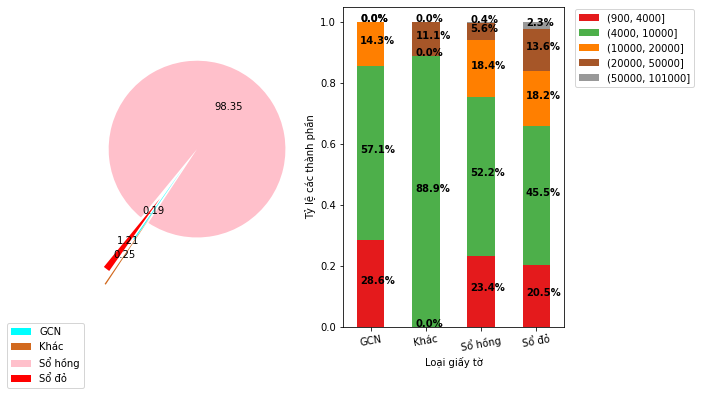

In [323]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30,20))
ax1.pie(Giay_to['So_luong_nha'], autopct='%.2f',  explode = [0,0.6,0.25,0.45], colors=['cyan', 'chocolate', 'pink', 'red'], startangle=-125)
# ax1.legend(loc=(-0.3,-0.5))
# ax1.set_ylabel('')
ax1.legend(['GCN', 'Khác', 'Sổ hồng', 'Sổ đỏ'], loc=(-0.3,-0.5))
ax1.set_aspect('equal')
stacked =cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6), ax=ax2, legend={'location':(1.15,0.6)})
ax2.set_xlabel("Loại giấy tờ")
ax2.set_ylabel("Tỷ lệ các thành phần")
ax2.legend(loc=(1.05,0.75))
ax2.set_xticklabels(['GCN', 'Khác', 'Sổ hồng', 'Sổ đỏ'], rotation =10)
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        ax2.text(x=n - 0.19,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.tight_layout()
plt.savefig('piestack.png')
        

**Nhận xét:**

- Phần lớn nhà ở HCM có sổ hồng (>98%). Các loại giấy tờ khác chiếm <2%.
- Phần lớn nhà ở HCM có giá tầm <10 tỷ.
- Hầu hết nhà ở HCM có giá tầm <20 tỷ.

### pairplot

In [324]:
# 50. Vẽ biểu đồ thể hiện mối quan hệ giữa kích thước nhà (dài, rộng), diện tích nhà và giá nhà theo vị trí

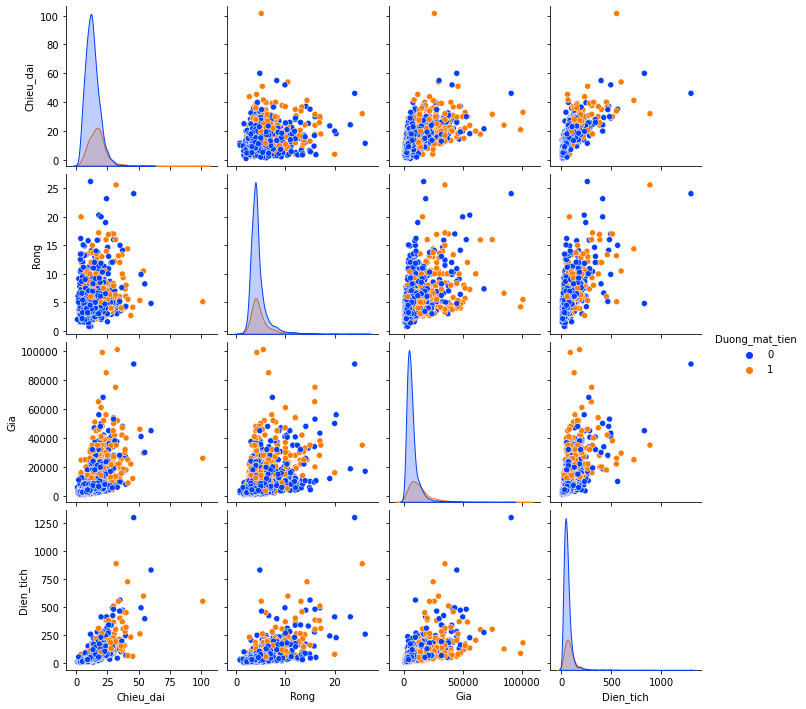

In [325]:
g = sns.pairplot(data=data_final, vars=['Chieu_dai', 'Rong', 'Gia', "Dien_tich"], hue='Duong_mat_tien', kind='scatter', palette='bright')

**Nhận xét:** Nhà ở đường mặt tiền HCM chiếm số lượng ít. Kích thước nhà có liên quan tới giá nhà.

In [ ]:
# 51. Vẽ biểu đồ thể hiện mối quan hệ giữa kích thước nhà (dài, rộng), diện tích nhà và giá nhà theo yếu tốt tầng hầm

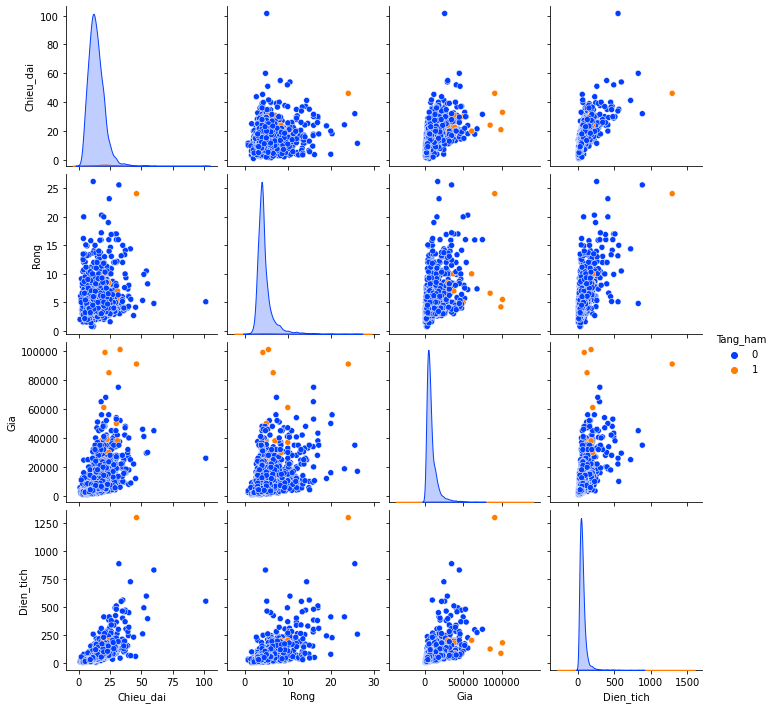

In [326]:
sns.pairplot(data=data_final, vars=['Chieu_dai', 'Rong', 'Gia', "Dien_tich"], hue='Tang_ham', kind='scatter', palette='bright')

**Nhận xét:** Hầu hết nhà ở HCM không xây hầm, số nhà xây hầm chiếm số lượng rất hiếm. Kích thước nhà có liên quan tới giá nhà

**Nhận xét:** Nhà ở HCM chủ yếu thiết kế hướng về phí Đông Bắc, Đông Nam, Tây Bắc, Tây Nam (16 - 18% mỗi hướng)

**Nhận xét:** Các quận có tổng giá nhà cao nhất gồm Quận 10, Bình Thạnh, Quận 3, Gò Vấp, Phú Nhuận

**Nhận xét:** Tổng diện tích nhà ở ở ở HCM chủ yếu ở các quận Thủ Đức, Gò Vấp, Quận 8, Bình Thạnh, Quận 7

<h1 style='color:blue;'><b>SAVE DATA</b></h1>

In [331]:
data_final.to_csv('cleaned_house_price.csv')

<h1 style='color:blue;'><b>NOTE FOR MODELS</b></h1>

- For the next step, we will encode for category features and scales output - price attribute for by log scales because it is right skewed or may be we try min-max scaler because it have outliers.
- We will try some model such as LinearRegression, polynominal regression, Decision Tree Regression, Support Vector regression, Random Forest regression, Ridge regression, Lasso regression, XGboost regression, ...